* I'm from South Korea so I chose data of Seoul for my project.

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

* Line chart uses the moving average for 10-year each in order to visualize the graph effectively.
* As you can see, Seoul and Global have a similar trend that both temperature are gradually increasing around since 1840.
* However, Seoul was already hotter than the rest of the world even before the Industrial Revolution.
* Presumably, other factors such as geographical location contributed to warming Seoul besides the effect of global warming.

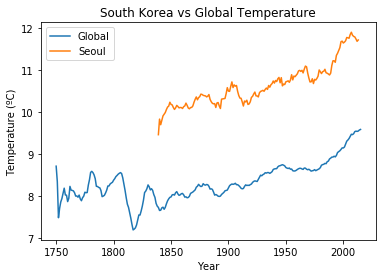

In [71]:
# reading global data
glbtmp = pd.read_csv('/Users/gujungun/Downloads/globaldata10.csv')
glbtmp_rolling = glbtmp.rolling(window=10, min_periods=1).mean()
plt.plot(glbtmp['year'],glbtmp_rolling['gb_avg_temp'], label='Global')
plt.legend()

# reading Seoul data from city_data
citytmp = pd.read_csv('/Users/gujungun/Downloads/citydata.csv')
seoul = citytmp[((citytmp.city == 'Seoul'))]
seoul_rolling = seoul.rolling(window=10, min_periods=1).mean()
plt.plot(seoul['year'], seoul_rolling['avg_temp'], label='Seoul')

plt.xlabel('Year')
plt.ylabel('Temperature (ºC)')
plt.title('South Korea vs Global Temperature')
plt.legend()

* Seoul has been always hotter than Global world.
* As 'diff' columns refers the temperature gap between Seoul and global yearly.
* Average temperature difference is 2.16 degree for last 175 years(from 1839 to 2013)

In [70]:
# joining two dataframes to one
temp_join = pd.merge(seoul, glbtmp, on = 'year')
temp_join['diff'] = temp_join['avg_temp'] - temp_join['gb_avg_temp']
print(temp_join.loc[:,['year','city','avg_temp','10yr_avg','gb_avg_temp','gb_10yr_avg','diff']])

     year   city  avg_temp  10yr_avg  gb_avg_temp  gb_10yr_avg  diff
0    1839  Seoul      9.47       NaN         7.63        7.738  1.84
1    1840  Seoul     10.21       NaN         7.80        7.666  2.41
2    1841  Seoul      9.44       NaN         7.69        7.671  1.75
3    1842  Seoul     10.13       NaN         8.02        7.728  2.11
4    1843  Seoul     10.33       NaN         8.17        7.744  2.16
5    1844  Seoul     10.15       NaN         7.65        7.694  2.50
6    1845  Seoul     10.25       NaN         7.85        7.740  2.40
7    1846  Seoul     10.57       NaN         8.55        7.825  2.02
8    1847  Seoul     10.59       NaN         8.09        7.896  2.50
9    1848  Seoul     10.36    10.150         7.98        7.943  2.38
10   1849  Seoul     10.39    10.242         7.98        7.978  2.41
11   1850  Seoul      9.69    10.190         7.90        7.988  1.79
12   1851  Seoul      9.33    10.179         8.18        8.037  1.15
13   1852  Seoul      9.52    10.1

* I used the 25-year moving average data in order to figure out if there is a tendency that Seoul is becoming more hot faster than Global is.
* By observing the graph, from the late of 1980s Seoul has been hotter steeper than the average temperature on Earth has been increased.

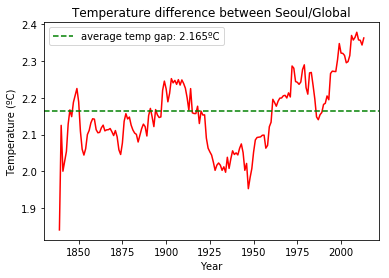

Average temperature gap: 2.1651999999999996 ºC


In [47]:
# Average temperature difference between Seoul and global
plt.figure()
rolling_diff = temp_join['diff'].rolling(window=25, min_periods=1).mean()

plt.plot(temp_join['year'], rolling_diff, color='Red', label='')
plt.axhline(temp_join['diff'].mean(), color='green', linestyle='dashed', label='average temp gap: 2.165ºC')
plt.xlabel('Year')
plt.ylabel('Temperature (ºC)')
plt.title('Temperature difference between Seoul/Global')
plt.legend()
plt.show()

print("Average temperature gap:", temp_join['diff'].mean(),'ºC')